# Netflix Gender Exploration Overview
This project takes the Flixable dataset and gathers the genders of each movies' cast using one of IMDb's public datasets to explore gender in Netflix's selection of movies and tv shows.

Netflix data is from the third-party Netflix collection search engine published on Kaggle here https://www.kaggle.com/shivamb/netflix-shows. It provides titles with other details of all the movies and tv shows available on Netflix as of 2019.

The names data is from IMDb's public datasets, and it lists all registered actors, actresses, writers and more along with their titles. Source link: https://datasets.imdbws.com/

I combined these two datasets to find the genders of the casts of each title, and used SpaCy's language model to analyze the words in the descriptions of the movies and tv shows to see if it could bring any insights into gender representation in Netflix movies.

# Import packages

In [61]:
import pandas as pd
import csv
from collections import defaultdict

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

import spacy
nlp = spacy.load("en_core_web_md")

# Combining the data

## Import the data

In [38]:
data = pd.read_csv('D:/Coding/Projects/Python/Netflix Exploration/netflix_titles.csv')
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [39]:
names = pd.read_csv('D:/Coding/Projects/Python/Netflix Exploration/names.tsv', sep='\t')
names.head()

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,\N,\N,"soundtrack,actor,miscellaneous","tt0053137,tt0050419,tt0072308,tt0043044"
1,nm0000002,Lauren Bacall,\N,\N,"actress,soundtrack","tt0038355,tt0037382,tt0117057,tt0071877"
2,nm0000003,Brigitte Bardot,\N,\N,"actress,soundtrack,music_department","tt0054452,tt0059956,tt0049189,tt0057345"
3,nm0000004,John Belushi,\N,\N,"actor,soundtrack,writer","tt0080455,tt0077975,tt0078723,tt0072562"
4,nm0000005,Ingmar Bergman,\N,\N,"writer,director,actor","tt0060827,tt0083922,tt0050986,tt0050976"


In [46]:
len(data), len(names)

(6234, 10211963)

## Matching up names to genders

In [7]:
professions_key = {}
for i, name in enumerate(names['primaryName'].values):
    professions_key[name] = names['primaryProfession'].values[i]

In [47]:
genders = [''] * len(data)
for i, row in list(data.iterrows()):
    cast = row['cast']
    gs = []
    if (str(cast) != 'nan'):
        for name in cast.split(', '):
            #print (name)
            g = ''
            if (name in professions_key.keys()):
                professions = str(professions_key[name])
                if ('actor' in professions):
                    g = 'male'
                elif ('actress' in professions):
                    g = 'female'
            gs.append(g)
    if (gs):
        genders[i] = ','.join(gs)

In [48]:
len(genders)

6234

In [49]:
genders[:10]

[',,,,,,male,female,female,',
 'male',
 ',female,male,male,male,female,male,,male,male,male,male',
 'male,male,,male,male,,male,',
 'female,,male,male,female,male,male,male,female,female,,male',
 'male,male,female,,female',
 'male,male,,female,,female,male,male,male',
 'male',
 '',
 'male,,,male,male,female,,male,female,male,male']

In [50]:
sum([1 if s else 0 for s in genders]) # how many have at least some gender in them

5376

In [51]:
data['genders'] = genders
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,genders
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,",,,,,,male,female,female,"
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,male
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...",",female,male,male,male,female,male,,male,male,..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...,"male,male,,male,male,,male,"
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,"female,,male,male,female,male,male,male,female..."


## Save and reload the combined data

In [52]:
data.to_csv('D:/Coding/Projects/Python/Netflix Exploration/netflix_titles_with_genders.csv', index=False, header=True)

In [62]:
data = pd.read_csv('D:/Coding/Projects/Python/Netflix Exploration/netflix_titles_with_genders.csv')

# Pulling information to be visualized

## Overall parts of speech for word clouds

In [31]:
# overall parts of speech word clouds
pos_words = defaultdict(lambda: [])
for description in data['description']:
    doc = nlp(description)
    for token in doc:
        p = token.pos_
        pos_words[p].append(token.lemma_)
        
# turn into one long string to be able to input into wordcloud generator
for p in pos_words:
    pos_words[p] = ' '.join(pos_words[p])

## Gendered words for each part of speech
### Gathering counts

In [14]:
counts = defaultdict(lambda: defaultdict(lambda: 0))
for i, row in data.iterrows():
    leading_gender = str(row['genders']).split(',')[0]
    
    doc = nlp(str(row['description']))
    for token in doc:
        counts[leading_gender][token.lemma_] += 1

In [15]:
total = {key:sum(list(counts[key].values())) for key in counts.keys() if key != 'nan' and key != ''}
total

{'male': 71864, 'female': 36215}

This tells me how much to normalize female word count values by so that we can compare how frequent certain words show up for each gender, and not just how frequent in general. I can normalize female count values by multiplying by 71864 / 36215.

Getting the counts of each word in each part of speech for both genders will let me then calculate how likely they are to appear in a certain leading gender's movie description.

In [53]:
pos_counts = defaultdict(lambda: defaultdict(lambda: defaultdict(lambda: 0)))
for i, row in data.iterrows():
    leading_gender = str(row['genders']).split(',')[0]
    
    doc = nlp(str(row['description']))
    for token in doc:
        pos_counts[leading_gender][token.pos_][token.lemma_] += 1

### I need a store of all the words so I can calculate the likelihoods for each of them

In [54]:
all_pos = defaultdict(lambda: set())
for gender in ['male', 'female']:
    for p in pos_counts[gender].keys():
        all_pos[p].update(set(pos_counts[gender][p].keys()))

Here I go through each part of speech *p*, and for each word in that part of speech, I calculate how much more likely it is for a word to be female or male, and make the value signed to represent each gender, i.e. more likely female is negative.

In [18]:
norm = 77248 / 37862
pos_probs = defaultdict(lambda: defaultdict()) # number saying how likely it is for the word to be used in male leading description or female --- for each pos
for p in all_pos.keys():
    for word in all_pos[p]:
        male_count = pos_counts['male'][p][word]
        female_count = pos_counts['female'][p][word] * norm
        male_prob = male_count / (male_count + female_count)
        female_prob = female_count / (male_count + female_count)
        prob = (max(male_prob, female_prob) / (min(male_prob, female_prob) + int(min(male_prob, female_prob) == 0))) * (2 * int(male_prob > female_prob) - 1)
        pos_probs[p][word] = prob

Previously, each word was a key in a dictionary that corresponded to it's likelihood, but here I convert the dictionaries to lists for tuples so I can sort them.

In [19]:
for p in pos_probs.keys():
    pos_probs[p] = sorted([(word, pos_probs[p][word]) for word in pos_probs[p] if abs(pos_probs[p][word]) != 1], key = lambda x: x[1])

In [20]:
pos_probs.keys()

dict_keys(['PROPN', 'VERB', 'ADP', 'DET', 'NOUN', 'CCONJ', 'ADJ', 'PUNCT', 'ADV', 'PART', 'AUX', 'SCONJ', 'PRON', 'NUM', 'SYM', 'INTJ', 'X', 'SPACE'])

Finally, I can loop through the first or last 10-30 values to get a grasp of the most gendered words.

In [21]:
for word, num in pos_probs['VERB'][:30]:
    print (word)

#pos_probs['VERB'][:30]
#pos_probs['VERB'][len(pos_probs['VERB']) - 30:][::-1]

treat
vacation
sing
beset
propose
assault
mend
fade
lurk
journey
descend
consume
snap
arrest
kick
scramble
celebrate
visit
disturb
swap
hook
perceive
exile
tie
simmer
mean
wonder
anger
study
ensue


## Gender representation in genres
Here I define a movie's leading gender by it's first actor's gender, although I also store values for movies with a majority cast found as a certain gender, which is stored in variables labeled with 'cast'. If the first actor does not have an IMDb page, then my program didn't find a gender for it, and it isn't used. This does leave out a decent portion of movies (a bit less than 1/3rd) however as the more popular actors and actresses very commonly have IMDb pages, this is representative of the more common movies that people will be viewing, so it still aligns with the original intent.

In [55]:
cast = defaultdict(lambda: defaultdict(lambda: 0))
leading = defaultdict(lambda: defaultdict(lambda: 0))
for i, row in data.iterrows():
    leading_gender = str(row['genders']).split(',')[0]
    
    majority_gender = ''
    total = str(row['genders']).split(',').count('male')
    female = str(row['genders']).split(',').count('female')
    if (total != 0):
        if (female / total >= 0.5):
            majority_gender = 'female'
        else:
            majority_gender = 'male'
    
    genres = str(row['listed_in']).split(', ')
    for genre in genres:
        leading[leading_gender][genre] += 1
        cast[majority_gender][genre] += 1

# These genres don't give helpful information
del leading['male']['TV Shows']
del leading['male']['Movies']
del leading['female']['Movies']

The following are just some numbers to give a general sense of the proportions of movies with certain leading genders, and how many genres they were tagged with.

In [23]:
total_cast = {gender:sum(list(cast[gender].values())) for gender in cast}
total_leading = {gender:sum(list(leading[gender].values())) for gender in leading}

In [24]:
total_cast

{'female': 7038, 'male': 4203, '': 2429}

In [25]:
total_leading

{'': 3126, 'male': 5907, 'female': 2940, 'nan': 1697}

The only tag means that it is solely the count of movies with a certain gender, not how many genre tags were present for movies with a certain gender.

In [26]:
total_cast_only = defaultdict(lambda: 0)
total_leading_only = defaultdict(lambda: 0)
for i, row in data.iterrows():
    leading_gender = str(row['genders']).split(',')[0]
    
    majority_gender = ''
    total = str(row['genders']).split(',').count('male')
    female = str(row['genders']).split(',').count('female')
    if (total != 0):
        if (female / total >= 0.5):
            majority_gender = 'female'
        else:
            majority_gender = 'male'
    total_cast_only[majority_gender] += 1
    total_leading_only[leading_gender] += 1

In [27]:
total_cast_only

defaultdict(<function __main__.<lambda>()>,
            {'female': 2993, 'male': 1949, '': 1292})

In [28]:
total_leading_only

defaultdict(<function __main__.<lambda>()>,
            {'': 1352, 'male': 2622, 'female': 1324, 'nan': 936})

Since I am using leading actors to tag gender, these numbers tell me I can normalize female counts by multiplying by 2622 / 1324.

# Visualization
## Word cloud of overall descriptions nouns and verbs

In [30]:
def plot_wordcloud(text):
    ax, fig = plt.subplots(figsize=(10, 10))
    wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', width=5000, height=5000, colormap='bwr').generate(text)
    plt.imshow(wordcloud)
    plt.axis('off')
    #plt.savefig('D:/Coding/Projects/Python/Netflix Exploration/nouncloud.png', bbox_inches='tight')
    #plt.savefig('D:/Coding/Projects/Python/Netflix Exploration/verbcloud.png', bbox_inches='tight')
    plt.show()

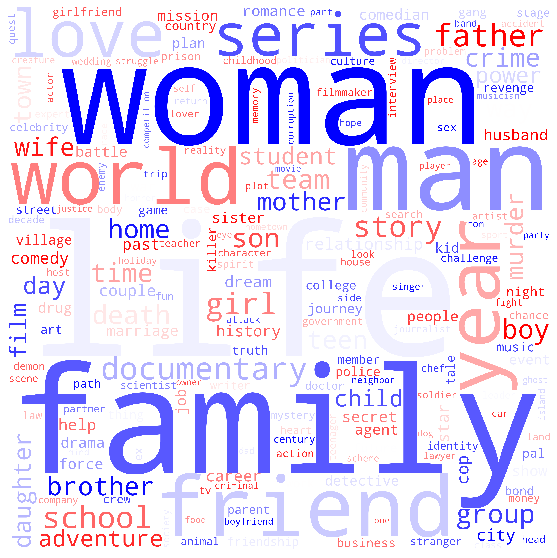

In [32]:
plot_wordcloud(pos_words['NOUN'])

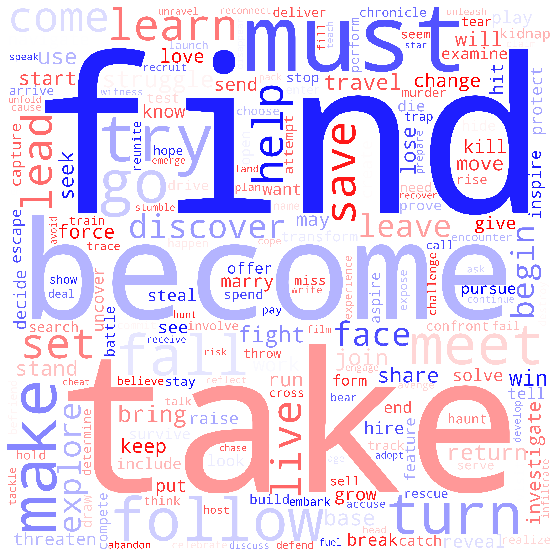

In [33]:
plot_wordcloud(pos_words['VERB'])

## Gendered words by parts of speech

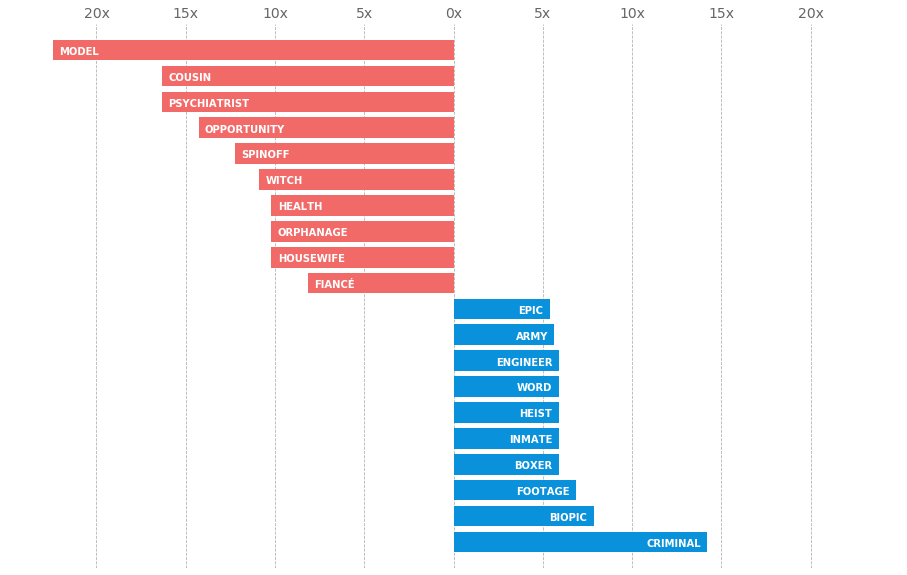

In [59]:
# woman man word usage likelihood ratios
pos = 'NOUN'
fig, ax = plt.subplots(figsize=(16, 10))

# plot the bars --- zorder is to place in front of gridlines
female_bars = ax.barh(y=list([i for i in range(1, 11)]), width=list([i[1] for i in pos_probs[pos][:10][::-1]]), \
                   color='#f26a68', zorder=2, label='Female')
male_bars = ax.barh(y=list([i for i in range(-9, 1)]), \
                    width=list([i[1] for i in pos_probs[pos][len(pos_probs[pos]) - 10:][::-1]]), \
                    color='#0991db', zorder=2, label='Male')

# x axis
## range for nouns
if (pos == 'NOUN'):
    plt.xlim(-25, 25.01) #.01 so that final right gridline will appear
    plt.xticks(ticks=list(range(-20, 21, 5)), labels=[str(abs(i)) + 'x' for i in range(-20, 21, 5)], \
              fontsize=14, color=(0.4,0.4,0.4))
## range for verbs
elif (pos == 'VERB'):
    plt.xlim(-11, 11)
    plt.xticks(ticks=list(range(-10, 11, 2)), labels=[str(abs(i)) + 'x' for i in range(-10, 11, 2)], \
              fontsize=14, color=(0.4,0.4,0.4))

# y axis
plt.ylim(-10, 11)
male_words = [i[0] for i in pos_probs[pos][len(pos_probs[pos]) - 10:]][::-1]
female_words = [i[0] for i in pos_probs[pos][:10]][::-1]
l = male_words + female_words
#plt.yticks(ticks=list(range(-9, 1)) + list(range(1, 11)), labels=l)
ax.axes.get_yaxis().set_visible(False)

# gridlines
ax.xaxis.grid(True, linestyle='--')

# put x labels at the top
ax.xaxis.tick_top()

# make ticks disappear
ax.tick_params(axis=u'both', which=u'both',length=0)

# remove outline box
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# add words to each bar
for i, bar in enumerate(female_bars):
        width = bar.get_width()
        y = bar.get_y()
        ax.annotate('{}'.format(female_words[i].upper()),
                    xy=(width + 0.35, y + 0.35),
                    xytext=(0, 0),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='left', va='center', color='#ffffff', weight='bold')

for i, bar in enumerate(male_bars):
        width = bar.get_width()
        y = bar.get_y()
        ax.annotate('{}'.format(male_words[i].upper()),
                    xy=(width - 0.35, y + 0.35),
                    xytext=(0, 0),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='right', va='center', color='#ffffff', weight='bold')

#plt.savefig('D:/Coding/Projects/Python/Netflix Exploration/verbs.png', bbox_inches='tight')

plt.show()

## Gender represenation in different genres

In [56]:
leading_male = sorted([(genre, leading['male'][genre] / total_leading_only['male']) for genre in leading['male'].keys()], key = lambda x: x[0])
leading_female = sorted([(genre, leading['female'][genre] / total_leading_only['female']) for genre in leading['female'].keys()], key = lambda x: x[0])

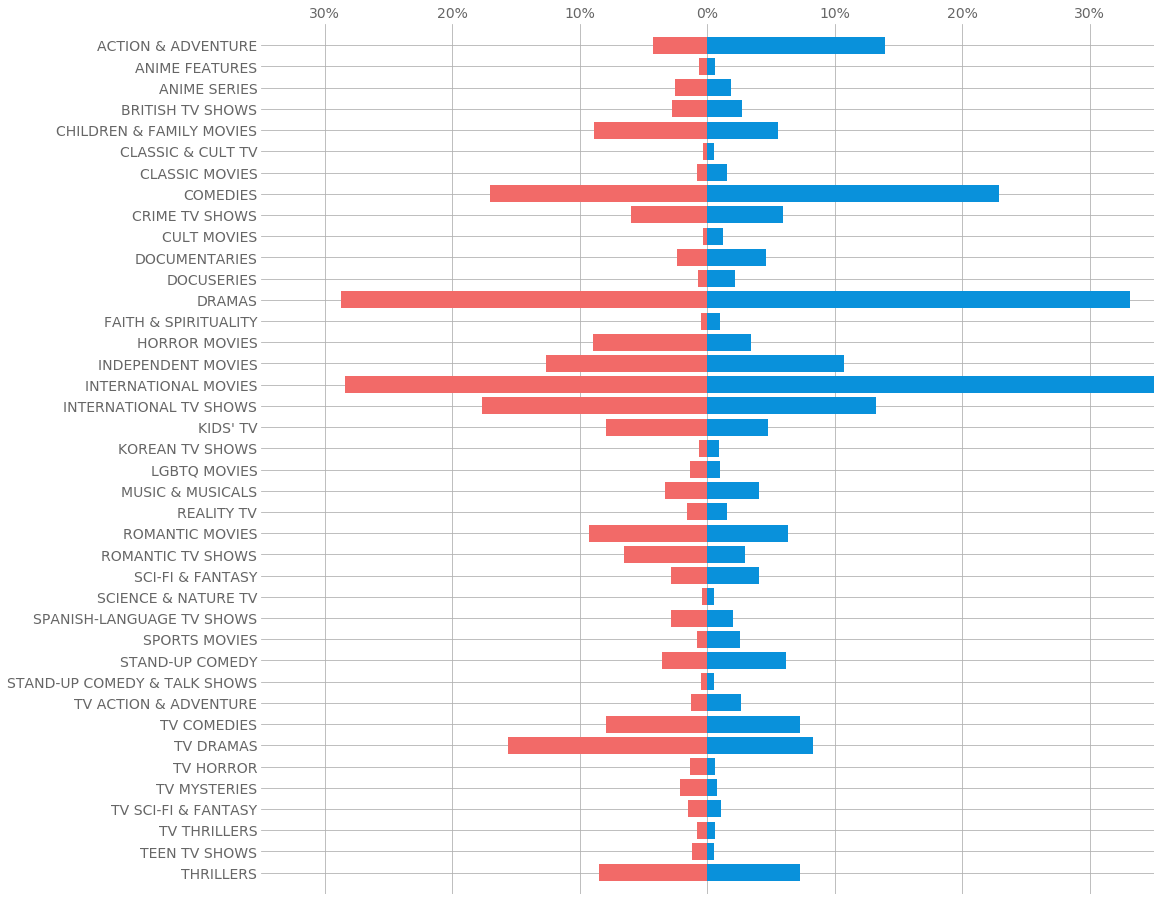

In [57]:
# representation in genres
fig, ax = plt.subplots(figsize=(16, 16))

# plot the bars --- zorder is to place in front of gridlines
female_bars = ax.barh(y=[i[0] for i in leading_female][::-1], width=list([-i[1] for i in leading_female][::-1]), \
                     color='#f26a68', zorder=2)
male_bars = ax.barh(y=[i[0] for i in leading_male][::-1], width=list([i[1] for i in leading_male][::-1]), \
                     color='#0991db', zorder=2)

# x axis
plt.xlim(-0.35, 0.35)
plt.xticks(ticks=list([i / 10 for i in range(-3, 4, 1)]), labels=[str(abs(i) * 10) + '%' for i in range(-3, 4, 1)], \
          fontsize=14, color=(0.4,0.4,0.4))
# put ticks at the top
ax.xaxis.tick_top()

# y axis
plt.ylim(-1, 40)
plt.yticks(ticks=[i[0] for i in leading_male][::-1], labels=[i[0].upper() for i in leading_male][::-1], \
           fontsize=14, color=(0.4,0.4,0.4))
ax.tick_params(axis=u'both', which=u'both',length=0)

# remove outline box
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# gridlines
plt.grid()

#plt.savefig('D:/Coding/Projects/Python/Netflix Exploration/genres.png', bbox_inches='tight')

plt.show()